<center><h1>ML Lab: Multi-Layer-Perceptron</h1></center>
<center><h3>Arush Sharma 16BCE1127</h3></center>

<h4>In this lab experiment, I am going to implement Multi Layer Perceptron using Sklearn's MLPClassifier. First I am going to implement on banknote dataset and then on Mushroom dataset.</h1>

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [10]:
banknote_data=pd.read_csv('banknote.csv')

In [11]:
banknote_data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [12]:
banknote_data=banknote_data.round()

In [14]:
X=banknote_data.values[:,0:4]
y=banknote_data.values[:,4]
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=100)

<p>Importing MPLClassifier from sklearn.neural_network library</p>

In [15]:
from sklearn.neural_network import MLPClassifier

<h4>Setting up the hyper-parameters</h4>

In [25]:
mlp=MLPClassifier(hidden_layer_sizes=(5),activation='relu', max_iter=50000,solver='adam',alpha=0.0001,learning_rate='constant', 
                      learning_rate_init=0.001)
model=mlp.fit(X_train, y_train)
predictions=mlp.predict(X_test)


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
import matplotlib.pyplot as plt

In [28]:
import numpy as np
print(np.shape(X_train))
print(np.shape(y_train))

(1097, 4)
(1097,)


In [236]:
print(confusion_matrix(y_test,predictions))

[[2079    6]
 [  35 1942]]


In [237]:
print(accuracy_score(y_test, predictions))

0.9899064500246184


<center><h1>Implementation of MLP on Mushrooom dataset</h1></center>

In [238]:
data=pd.read_csv("mushroom.csv")

<h4>Replacing categorical data with Characters to numbers so that classifier is able to work properly</h4>

In [35]:
newcategory={"class":{"e":0,"p":1},
             "capshape":{"x":0,"f":1,"k":2,"b":3,"s":4,"c":5},
             "capsurface":{"y":0,"s":1,"f":2,"g":3},
             "capcolor":{"n":0,"g":1,"e":2,"y":3,"w":4,"b":5,"p":6,"c":7,"u":8,"r":9},
             "bruises":{"f":0,"t":1},
             "odor":{"n":0,"f":1,"s":2,"y":3,"l":4,"a":5,"p":6,"c":7,"m":8},
             "gillattach":{"f":0,"a":1},
             "gillspace":{"c":0,"w":1},
             "gillsize":{"b":0,"n":1},
             "gillcolor":{"b":0,"p":1,"w":2,"n":3,"g":4,"h":5,"u":6,"k":7,"e":8,"y":9,"o":10,"r":11},
             "stalkshape":{"t":0,"e":1},
             "stalkroot":{"b":0,"?":1,"e":2,"c":3,"r":4},
             "stalksurfar":{"s":0,"k":1,"f":2,"y":3},
             "stalksurfbr":{"s":0,"k":1,"f":2,"y":3},
             "stalkcolorar":{"w":0,"p":1,"g":2,"n":3,"b":4,"o":5,"e":6,"c":7,"y":8},
             "stalkcolorbr":{"w":0,"p":1,"g":2,"n":3,"b":4,"o":5,"e":6,"c":7,"y":8},
             "veiltype":{"p":0},
             "veilcolor":{"w":0,"o":1,"n":2,"y":3},
             "ringnumber":{"o":0,"t":1,"n":2},
             "ringtype":{"p":0,"e":1,"l":2,"f":3,"n":4},
             "sporeprint":{"w":0,"n":1,"k":2,"h":3,"r":4,"u":5,"o":6,"b":7,"y":8},
             "pop":{"v":0,"y":1,"s":2,"n":3,"a":4,"c":5},
             "habitat":{"d":0,"g":1,"p":2,"l":3,"u":4,"m":5,"w":6}}

data.replace(newcategory,inplace=True)

<h4> Using 50% dataset as test</h4>

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

mlp=MLPClassifier(hidden_layer_sizes=(5),activation='relu', max_iter=1000,solver='adam',alpha=0.0001,learning_rate='constant', 
                      learning_rate_init=0.001)


In [233]:
#X=data[['capshape','capsurface','capcolor','bruises','odor','gillattach','gillspace','gillsize','gillcolor','stalkshape','stalksurfar','stalksurfbr','stalkcolorar','veiltype','veilcolor','ringnumber','ringtype','sporeprint','pop','habitat']]
X=data[['capshape','capsurface','capcolor','bruises','odor']]
y=data['class']
model=mlp.fit(X_train,y_train)

In [235]:
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test, predictions))


[[2079    6]
 [  35 1942]]
0.9899064500246184


In [ ]:
nodearray=[]
for i in range(1,20):
    nodearray.append(i)
    
plt.plot(nodearray,lossarray)
plt.ylabel("Error")

In [62]:
mlp=MLPClassifier(hidden_layer_sizes=(5),activation='relu', max_iter=50000,solver='adam',alpha=0.0001,learning_rate='constant', 
                      learning_rate_init=0.001)

<h4>I will now train MLP for different combination of hidden units and hidden layers. I will train it 100 times, each with different combination of 1-10 hidden layers and 1-10 hidden units. The combination will be 1 hidden layer with 1 hidden in first iteration, 1 hidden layer each with 2 hidden units in second iteration ... 10 hidden layers each with 10 hidden units in hundredth iteration. The loss values and final accuracy score for each model will be stored in lists which will be used for visualization and inference</h4>

In [144]:
lossarray=[]
accuracyarray=[]
for i in range(1,11):
    for j in range(1,11):
        mlp=MLPClassifier(hidden_layer_sizes=(j,i),activation='relu', max_iter=1000,solver='adam',alpha=0.0001,learning_rate='constant', 
                      learning_rate_init=0.001)
        model=mlp.fit(X_train,y_train)
        lossarray.append(model.loss_curve_)
        predictions=model.predict(X_test)
        accuracyarray.append(accuracy_score(y_test, predictions))


Text(0.5,0,'Number of Hidden Layers, Hidden Units')

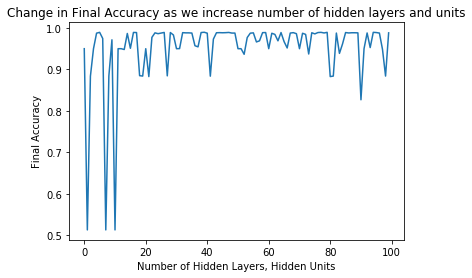

In [232]:
plt.title("Change in Final Accuracy as we increase number of hidden layers and units")
plt.plot(accuracyarray)
plt.ylabel("Final Accuracy")
plt.xlabel("Increasing number of Hidden Layers, Hidden Units -->")


<h4> Here we can see that there is less variation in final accuracy as we on increasing Number of Hidden Layer and Hidden units</h4>

In [147]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 30), dpi=300, facecolor='w', edgecolor='k')

for i in range(0,25):
    plt.subplot(5, 5, i+1)
    hidden_units=(4*i)%10+1
    hidden_layers=int(4*i/10)+1
    title="Hidden Layers: "+str(hidden_layers)+", Hidden units: "+str(hidden_units)
    plt.title(title,loc='center')
    plt.plot(lossarray[i*4])
    plt.xlabel("Final Accuracy= "+str(round(accuracyarray[i],3)))
    
    

<h4> From the figure we see the loss/iteration curves for different combination of Hidden Layer and Hidden Units per hidden layer</h4> 

<h3>Now we will give the final accuracy score in tabular form for model as we increase number of hidden layers and hidden units</h3>  

In [227]:
print("      1     2     3     4     5     6     7     8     9    10\n")
for i in range(0,100):
    hidden_units=(4*i)%10+1
    hidden_layers=int(4*i/10)+1
    if(i==0):
        print(i+1, end='    ')
    if(i==90):
        print('10', end='   ')
    elif(i>0 and int(i%10)==0 and i!=90):
        print(int(i/10)+1, end='    ')
    
    print(round(accuracyarray[i],2), end='  ')
    if((i+1)%10==0 and i!=0):
        print('\n')


      1     2     3     4     5     6     7     8     9    10

1    0.95  0.51  0.88  0.95  0.99  0.99  0.97  0.51  0.88  0.97  

2    0.51  0.95  0.95  0.95  0.99  0.95  0.99  0.99  0.89  0.88  

3    0.95  0.88  0.98  0.99  0.99  0.99  0.99  0.88  0.99  0.98  

4    0.95  0.95  0.99  0.99  0.99  0.99  0.96  0.95  0.99  0.99  

5    0.99  0.88  0.97  0.99  0.99  0.99  0.99  0.99  0.99  0.99  

6    0.95  0.95  0.94  0.98  0.99  0.99  0.97  0.97  0.99  0.99  

7    0.95  0.99  0.98  0.97  0.99  0.97  0.95  0.99  0.99  0.99  

8    0.95  0.99  0.98  0.94  0.99  0.99  0.99  0.99  0.99  0.99  

9    0.88  0.88  0.99  0.94  0.96  0.99  0.99  0.99  0.99  0.99  

10   0.83  0.95  0.99  0.95  0.99  0.99  0.99  0.95  0.88  0.99  



<h4>Here x axis values represents number of hidden units per hidden layer and y axis values represents number of hidden layers(as given by numbers 1-10) and value inside matrix represents final accuracy value at that hidden units and hidden layers.</h4> 

<h2>Inference</h2>

<p>From the experiment we can infer that as we go on increasing the number of hidden layers and number of hidden units per hidden layer, we can see less variation in final accuracy and also the final accuracy is very good at 99% using 50% of dataset as training and 50% as test.</p>